In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Read in data
df = pd.read_csv(r'/Users/gabrielafilippelli/Downloads/movies.csv')

In [2]:
# Look at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
# See if there is any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [4]:
# Data types for columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [5]:
# Change data type of columns

df['budget'] = pd.to_numeric(df['budget'], errors='coerce').fillna(0).astype(int)

df['gross'] = pd.to_numeric(df['gross'], errors='coerce').fillna(0).astype(int)

In [69]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,533,5,0,2009,-1,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,-1,162.0,-1
7445,535,5,0,2019,-1,8.4,903000.0,162,743,2241,55,356000000,2797501328,-1,181.0,-1
3045,6896,5,6,1997,-1,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,-1,194.0,-1
6663,5144,5,0,2015,-1,7.8,876000.0,1125,2550,524,55,245000000,2069521700,-1,138.0,-1
7244,536,5,0,2018,-1,8.4,897000.0,162,743,2241,55,321000000,2048359754,-1,149.0,NaN


In [68]:
# Create correct Year column

df['yearcorrect'] = df['released'].astype(str)[0:4]

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,533,5,0,2009,-1,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,-1,162.0,-1
7445,535,5,0,2019,-1,8.4,903000.0,162,743,2241,55,356000000,2797501328,-1,181.0,-1
3045,6896,5,6,1997,-1,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,-1,194.0,-1
6663,5144,5,0,2015,-1,7.8,876000.0,1125,2550,524,55,245000000,2069521700,-1,138.0,-1
7244,536,5,0,2018,-1,8.4,897000.0,162,743,2241,55,321000000,2048359754,-1,149.0,NaN


In [60]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [15]:
pd.set_option('display.max_rows', None)

In [30]:
# Drop any duplicates

df['company'].drop_duplicates().sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3368                              Zentropa Entertainments
535                                  Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329          

In [67]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,533,5,0,2009,-1,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,-1,162.0,-1
7445,535,5,0,2019,-1,8.4,903000.0,162,743,2241,55,356000000,2797501328,-1,181.0,-1
3045,6896,5,6,1997,-1,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,-1,194.0,-1
6663,5144,5,0,2015,-1,7.8,876000.0,1125,2550,524,55,245000000,2069521700,-1,138.0,-1
7244,536,5,0,2018,-1,8.4,897000.0,162,743,2241,55,321000000,2048359754,-1,149.0,-1


In [32]:
# Budget high correlation
# Company high correlation


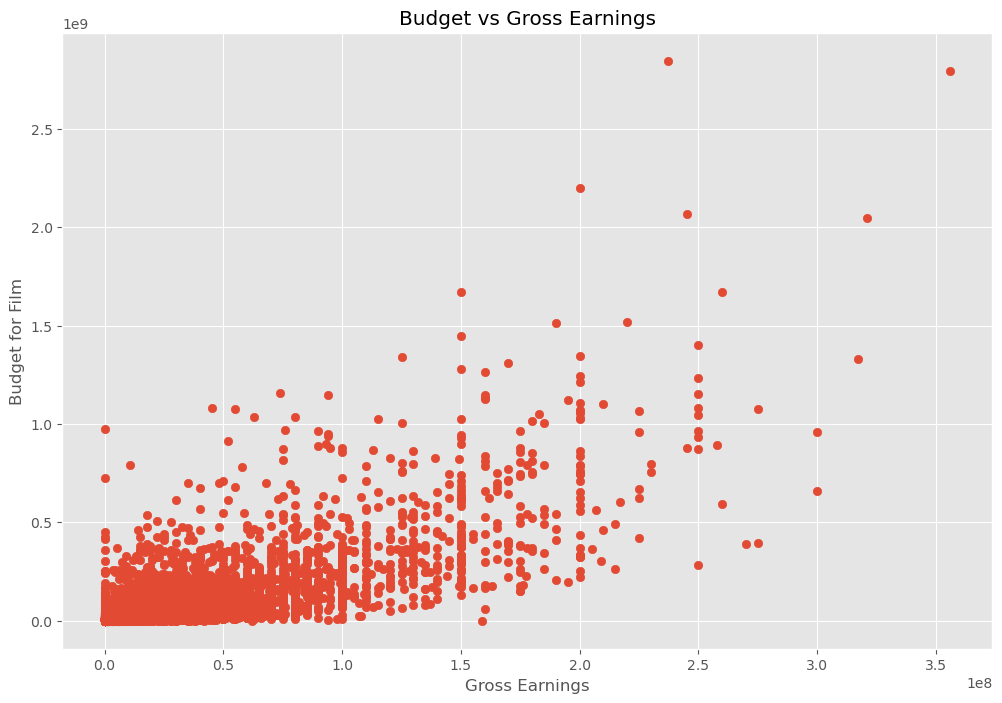

In [51]:
# Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')

plt.ylabel('Budget for Film')

plt.show()



In [37]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,NaN,7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,NaN,162.0,NaN
7445,Avengers: Endgame,PG-13,Action,2019,NaN,8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,NaN,181.0,NaN
3045,Titanic,PG-13,Drama,1997,NaN,7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,NaN,194.0,NaN
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,NaN,7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,NaN,138.0,NaN
7244,Avengers: Infinity War,PG-13,Action,2018,NaN,8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,NaN,149.0,NaN


<AxesSubplot:xlabel='budget', ylabel='gross'>

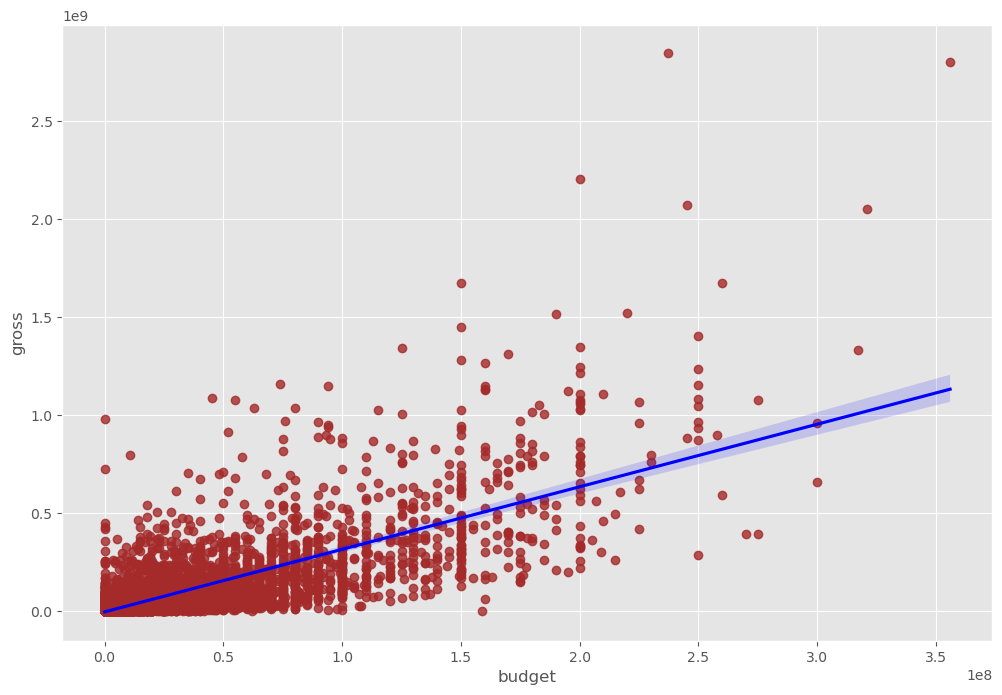

In [75]:
# Plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "brown"}, line_kws={"color":"blue"})

In [43]:
# Let's start looking at correlation

In [56]:
df.corr(method='pearson') #pearson, kendall, spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.309212,0.261900,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.399451
votes,0.222945,0.409182,1.000000,0.486862,0.632834,0.309212
budget,0.309212,0.055665,0.486862,1.000000,0.750157,0.269510
gross,0.261900,0.186392,0.632834,0.750157,1.000000,0.245235
runtime,0.120811,0.399451,0.309212,0.269510,0.245235,1.000000


In [49]:
# High correlation between budget and gross

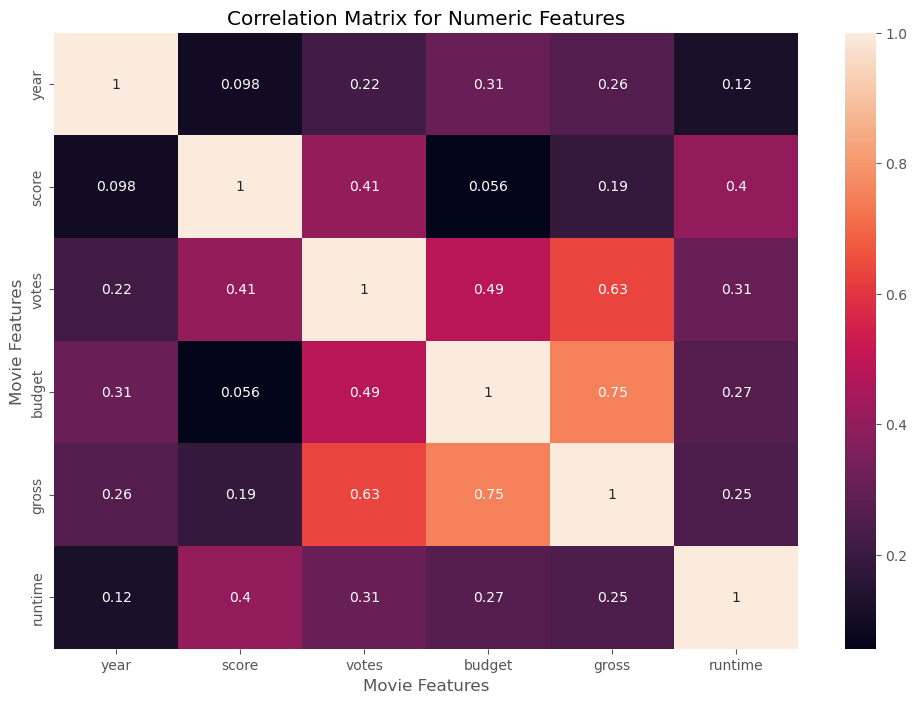

In [55]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()


In [57]:
# Looks at Company

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,NaN,7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,NaN,162.0,NaN
7445,Avengers: Endgame,PG-13,Action,2019,NaN,8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,NaN,181.0,NaN
3045,Titanic,PG-13,Drama,1997,NaN,7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,NaN,194.0,NaN
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,NaN,7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,NaN,138.0,NaN
7244,Avengers: Infinity War,PG-13,Action,2018,NaN,8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,NaN,149.0,NaN


In [72]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,533,5,0,2009,-1,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,-1,162.0,0
7445,535,5,0,2019,-1,8.4,903000.0,162,743,2241,55,356000000,2797501328,-1,181.0,0
3045,6896,5,6,1997,-1,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,-1,194.0,0
6663,5144,5,0,2015,-1,7.8,876000.0,1125,2550,524,55,245000000,2069521700,-1,138.0,0
7244,536,5,0,2018,-1,8.4,897000.0,162,743,2241,55,321000000,2048359754,-1,149.0,-1


In [70]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,533,5,0,2009,-1,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,-1,162.0,-1
7445,535,5,0,2019,-1,8.4,903000.0,162,743,2241,55,356000000,2797501328,-1,181.0,-1
3045,6896,5,6,1997,-1,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,-1,194.0,-1
6663,5144,5,0,2015,-1,7.8,876000.0,1125,2550,524,55,245000000,2069521700,-1,138.0,-1
7244,536,5,0,2018,-1,8.4,897000.0,162,743,2241,55,321000000,2048359754,-1,149.0,NaN


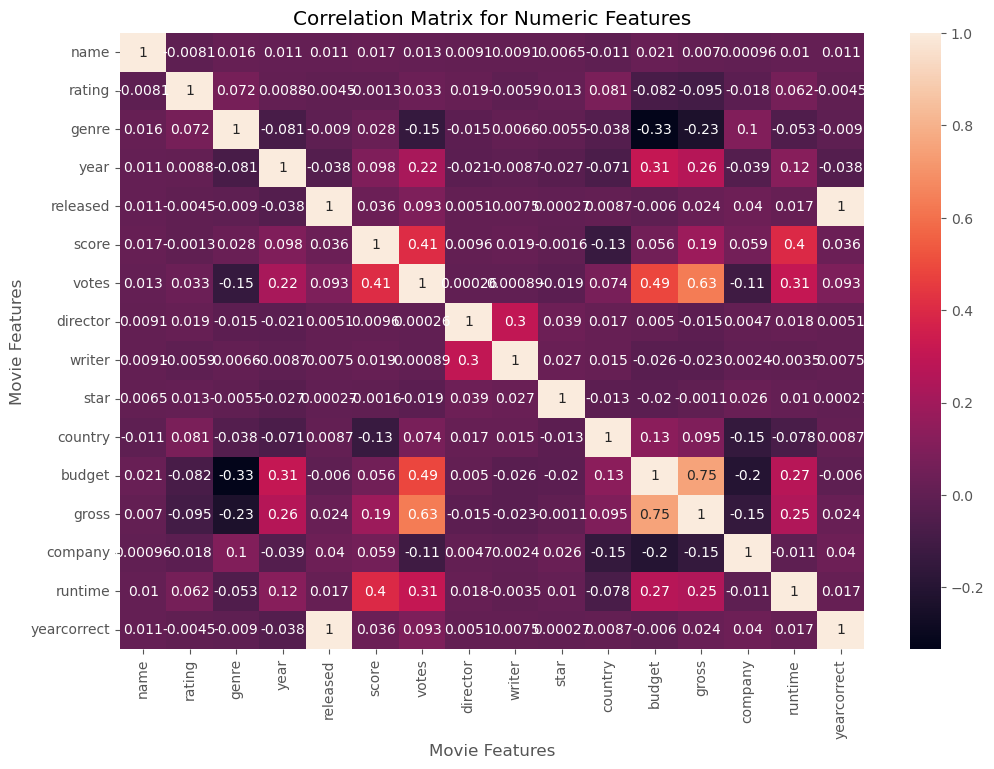

In [61]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [62]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,-0.008069,0.016355,0.011453,0.011129,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.020548,0.006989,0.000961,0.010392,0.011129
rating,-0.008069,1.000000,0.072423,0.008779,-0.004460,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.081939,-0.095450,-0.018387,0.062145,-0.004460
genre,0.016355,0.072423,1.000000,-0.081261,-0.009014,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.334021,-0.234297,0.099779,-0.052711,-0.009014
year,0.011453,0.008779,-0.081261,1.000000,-0.037772,0.097995,0.222945,-0.020795,-0.008656,-0.027242,-0.070938,0.309212,0.261900,-0.038516,0.120811,-0.037772
released,0.011129,-0.004460,-0.009014,-0.037772,1.000000,0.035525,0.092537,0.005068,0.007481,0.000271,0.008669,-0.006007,0.023640,0.040385,0.016698,1.000000
score,0.017097,-0.001314,0.027965,0.097995,0.035525,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.055665,0.186392,0.059243,0.399451,0.035525
votes,0.013088,0.033225,-0.145307,0.222945,0.092537,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.486862,0.632834,-0.109982,0.309212,0.092537
director,0.009079,0.019483,-0.015258,-0.020795,0.005068,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,0.004976,-0.014916,0.004740,0.017624,0.005068
writer,0.009081,-0.005921,0.006567,-0.008656,0.007481,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.025911,-0.022997,0.002383,-0.003511,0.007481
star,0.006472,0.013405,-0.005477,-0.027242,0.000271,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.019952,-0.001129,0.025543,0.010174,0.000271


In [64]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name         name           1.000000
             rating        -0.008069
             genre          0.016355
             year           0.011453
             released       0.011129
             score          0.017097
             votes          0.013088
             director       0.009079
             writer         0.009081
             star           0.006472
             country       -0.010737
             budget         0.020548
             gross          0.006989
             company        0.000961
             runtime        0.010392
             yearcorrect    0.011129
rating       name          -0.008069
             rating         1.000000
             genre          0.072423
             year           0.008779
             released      -0.004460
             score         -0.001314
             votes          0.033225
             director       0.019483
             writer        -0.005921
             star           0.013405
             country        0.081244
 

In [65]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget       genre         -0.334021
genre        budget        -0.334021
             gross         -0.234297
gross        genre         -0.234297
company      budget        -0.201700
budget       company       -0.201700
company      country       -0.150228
country      company       -0.150228
gross        company       -0.149630
company      gross         -0.149630
genre        votes         -0.145307
votes        genre         -0.145307
score        country       -0.133348
country      score         -0.133348
votes        company       -0.109982
company      votes         -0.109982
gross        rating        -0.095450
rating       gross         -0.095450
budget       rating        -0.081939
rating       budget        -0.081939
genre        year          -0.081261
year         genre         -0.081261
runtime      country       -0.078412
country      runtime       -0.078412
year         country       -0.070938
country      year          -0.070938
genre        runtime       -0.052711
r

In [66]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

votes        gross          0.632834
gross        votes          0.632834
             budget         0.750157
budget       gross          0.750157
yearcorrect  released       1.000000
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     yearcorrect    1.000000
             released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
# Votes and budget have the highest correlation to gross earnings

# Company has low correlation